In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 12 kB/s 


In [ ]:
#!nvidia-smi

In [3]:
!pip install face-recognition

     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=e72d20e970f79a220e3012f5855788c9893dc98b89fc5295c51873e7199efa95
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [18]:
import face_recognition
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import os

In [6]:
imgme = face_recognition.load_image_file('/content/drive/MyDrive/Face Attendence/MD Abdul Malek.jpg')
#imgme = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file('/content/drive/MyDrive/Face Attendence/Malek Test.jpg')
#imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB)

In [ ]:
faceLoc = face_recognition.face_locations(imgme)[0]
encodeme = face_recognition.face_encodings(imgme)[0]
cv2.rectangle(imgme,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2) # top, right, bottom, left
 
faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)

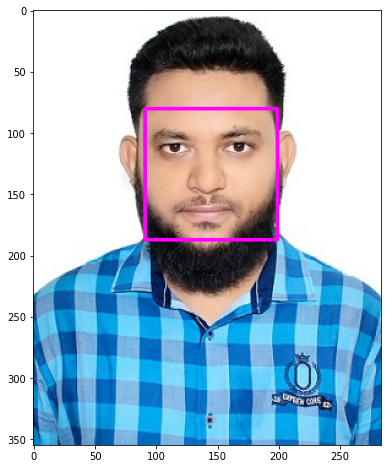

In [11]:
plt.imshow(imgme)
plt.show()

In [ ]:
results = face_recognition.compare_faces([encodeme], encodeTest)
faceDis = face_recognition.face_distance([encodeme], encodeTest)
cv2.putText(imgTest,f'{results} {round(faceDis[0],2)} ',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,255),3)

In [ ]:
plt.imshow(imgme)
plt.show()

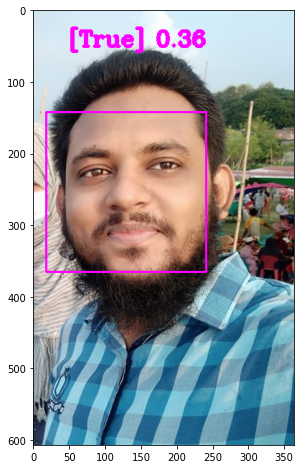

In [13]:
plt.imshow(imgTest)
#plt.figure(figsize=(10,5))
plt.rcParams['figure.figsize'] = [8, 8]
#plt.show()

In [23]:
path = "/content/drive/MyDrive/Face Attendence/Train"
images = []
className = []
myList = os.listdir(path)
for x,cl in enumerate(myList):
        curImg = cv2.imread(f'{path}/{cl}')
        images.append(curImg)
        className.append(os.path.splitext(cl)[0])
print("Total Classes Detected:",className)

Total Classes Detected: ['MD Abdul Malek', 'Ronaldo', 'Afridi']


In [25]:
def findEncodings(images):
    encodeList = []
    for img in images:
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

In [28]:
encodeListKnown = findEncodings(images)
print('Encodings Complete:', len(encodeListKnown))

Encodings Complete: 3


In [58]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data
  
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [99]:
def markAttendance(name):
    with open('/content/drive/MyDrive/Face Attendence/Attendance.csv','r+') as f:
        myDataList = f.readlines()
        nameList =[]
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in  line:
            now = datetime.now()
            dt_string = now.strftime("%H:%M:%S")
            f.writelines(f'{name},{dt_string}')

In [101]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break
    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    imgS = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

facesCurFrame = face_recognition.face_locations(imgS)
encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
    matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
    faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
    matchIndex = np.argmin(faceDis)

    if matches[matchIndex]:
      name = className[matchIndex].upper()
      y1,x2,y2,x1=faceLoc
      y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
      cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
      cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
      cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_DUPLEX, 1.0, (255, 255, 255), 1)
      markAttendance(name)

<IPython.core.display.Javascript object>